# Udacity Machine Learning k means mini-project

#### Prep stuff:

In [1]:
%matplotlib inline
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from sklearn.cluster import KMeans

In [2]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than 4 clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [3]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [4]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

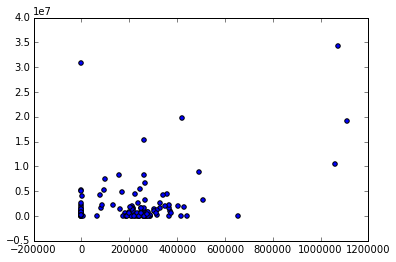

In [5]:
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

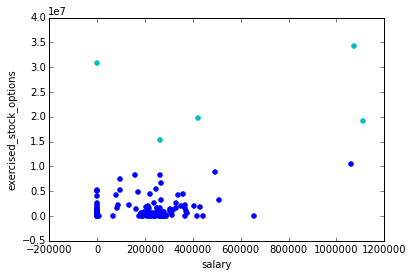

In [6]:
features_list = ["poi", feature_1, feature_2]
data2 = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data2 )
clf = KMeans(n_clusters=2)
pred = clf.fit_predict( finance_features )
Draw(pred, finance_features, poi, name="clusters_before_scaling.pdf", f1_name=feature_1, f2_name=feature_2)

#### Adding an additional feature:

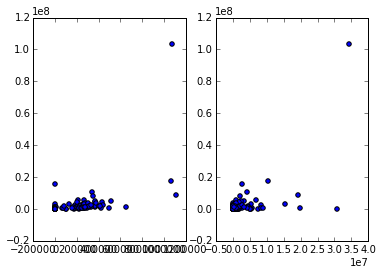

In [12]:
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"

feature_3 = "total_payments"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

plt.subplot(1,2,1)
for f1, f2, f3 in finance_features:
    plt.scatter( f1, f3 )
plt.subplot(1,2,2)
for f1, f2, f3 in finance_features:
    plt.scatter( f2, f3 )

plt.show()

#### Unsurprising results with these three dimensions:

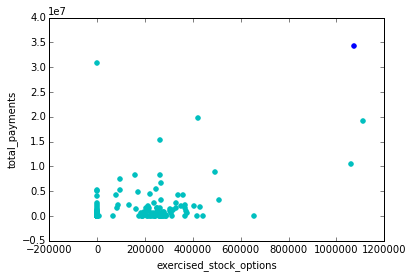

In [8]:
clf = KMeans(n_clusters=2)
pred = clf.fit_predict( finance_features )
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

One single-point cluster vs. everything else (demonstrating the importance of feature scaling).

#### Briefly looking at the scales on these features

In [15]:
stock_options = [data_dict[p]["exercised_stock_options"] for 
                p in data_dict.keys() if
                data_dict[p]["exercised_stock_options"] != 'NaN']

print 'max:',max(stock_options)
print 'min:',min(stock_options)
#print max(data_dict["exercised_stock_options"])

max: 34348384
min: 3285


In [16]:
salaries = [data_dict[p]["salary"] for 
                p in data_dict.keys() if
                data_dict[p]["salary"] != 'NaN']

print 'max:',max(salaries)
print 'min:',min(salaries)

max: 1111258
min: 477
